# Evaluación de la segmentación

In [1]:
import cv2 as cv #ver. 4.5.5
from matplotlib import pyplot as plt

In [2]:
imc_10c = cv.imread('im/10c.jpg')
imc_10t = cv.imread('im/10t.jpg')
imc_all = cv.imread('im/all.jpg')
imc_rgb = cv.imread('im/rgb.png')

In [3]:
img_10c = cv.imread('im/10c.jpg', cv.IMREAD_GRAYSCALE)
img_10t = cv.imread('im/10t.jpg', cv.IMREAD_GRAYSCALE)
img_all = cv.imread('im/all.jpg', cv.IMREAD_GRAYSCALE)
img_rgb = cv.imread('im/rgb.png', cv.IMREAD_GRAYSCALE)

In [4]:
im = imc_10t
# Los números son las intensidades min y máx para identificar el borde
canny = cv.Canny(im, 25, 100)
cv.imwrite('out/canny.jpg', canny)

True

Ver [Este enlace](https://circuitdigest.com/tutorial/image-segmentation-using-opencv) sobre segmentación y la documentación oficial de la [version 4.5.5 de opencv](https://docs.opencv.org/4.5.5/d4/d73/tutorial_py_contours_begin.html)

In [5]:
contours, hierarchy = cv.findContours(canny, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
out = cv.drawContours(im, contours, -1, (64,255,64), 3)
#texto = 'Contornos encontrados: '+ str(len(contours))
#cv.putText(out, texto, (10,20), cv.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 1)
cv.imwrite('out/out.jpg', out)
print('Número de contornos encontrados: ', len(contours))

Número de contornos encontrados:  18


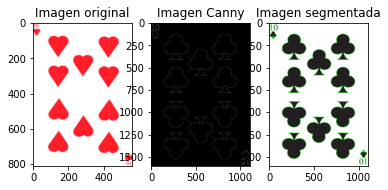

In [6]:
im = cv.cvtColor(imc_10c, cv.COLOR_BGR2RGB)
canny = cv.cvtColor(canny, cv.COLOR_BGR2RGB)
out = cv.cvtColor(out, cv.COLOR_BGR2RGB)
plt.subplot(131)
plt.imshow(im)
plt.title('Imagen original')
plt.subplot(132)
plt.imshow(canny)
plt.title('Imagen Canny')
plt.subplot(133)
plt.imshow(out)
plt.title('Imagen segmentada')
plt.show()

num = 0
for cnt in contours:
    image = cv.drawContours(im, contours, num, (38,139,210), 3)
    plt.subplot(4,5,(num + 1)) 
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title('Contorno' + str(num + 1)), plt.xticks([]), plt.yticks([])
    cv.imwrite('out/contorno-'+str(num + 1)+'.jpg', image)
    num = num + 1
plt.show()

# Otro

im = image_10t
# Imagen en binario
thresh = 128 #La mitad de bits
im_bin = cv.threshold(im, thresh, 255, cv.THRESH_BINARY)[1]

contornos, im_bin = cv.findContours(im_bin, cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
font = cv.FONT_HERSHEY_SIMPLEX
i=0
for c in contornos:
    M=cv.moments(c)
    if (M["m00"]==0): M["m00"]=1
    x=int(M["m10"]/M["m00"])
    y=int(M['m01']/M['m00'])

    mensaje = 'Num :' + str(i+1)
    cv.putText(im,mensaje,(x-40,y),font,0.75,(255,0,0),2,cv.LINE_AA)
    cv.drawContours(im, [c], 0, (255,0,0),2)
    cv.imwrite('out/outupt.jpg', im)
    i = i+1